In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## 1. 树引言

### 1.1 树的种类

- 无序树：树中任意子节点之间没有顺序关系，也称自由树。
  - 无序二叉树：每个节点至多有两个子树
    - 完全二叉树：对于深度 d(d>1)，除了第 d 层外，其他各层节点数量均达到最大值，且第 d 层所有节点从左到右紧密排列。  
    - 满二叉树：特殊的完全二叉树，所有叶节点均在最底层。
- 有序树：树中任意节点有顺序关系
  - 有序二叉树：每个节点至多有两个子树
      - 二叉查找树( Binary Search Tree，又称二叉搜索树，排序二叉树，有序二叉树)
      - 平衡二叉树( AVL )：任何节点的两棵子树的高度不大于 1 的二叉查找树
      - 红黑树
  - 霍夫曼树( 用于信息编码 )：带权路径最短的二叉树，又称最优二叉树
  - B 树：一种对读写优化的自平衡二叉树，能保持数据有序，拥有多余两个子树。

排序二叉树：插入、删除快，但是查找最差 O(n)，平衡二叉树：在排序二叉树基础上加入了平衡因子的理念，使插入与删除过程繁琐但是时间复杂度低，红黑树：介于两者之间。

### 1.2 树的存储
#### 1.2.1 顺序存储

将数据结构存在一个顺序表中，遍历时速度较快。但如果不是满树，那数组中会有空间的浪费。二叉树通常以链式结构存储

#### 1.2.2 链式存储

将树每个节点定义指针指向其子节点。缺点是指针域数量不定，解决办法是多叉数转化成二叉树。


### 1.3 树的应用场景

- xml, html 等
- 路由协议
- mysql 数据库索引
- 文件系统目录树
- AI领域，如决策树等

## 2. 二叉树


每个节点至多两个节点，左右节点。


### 2.1 二叉树性质

性质：
1. 任意二叉树，记叶节点的数量为 $N_0$，度数为 2 的节点数量为 $N_2$，有: $N_0 = N_2 + 1$
2. 第 $i(i>0)$ 层至多 $2^{(i - 1)}$ 个节点
3. 深度为 $k(k>0)$ 的二叉树至多有 $2^k - 1$ 个节点
4. 节点数量为 $n$ 的完全二叉树，其高度为 $log_2(n + 1)$
5. 对于完全二叉树，从上至下、左至右编号（顺序存储），编号起始为 1(根节点)。则左子节点为 2i，右子节点为 2i + 1，其父节点为 i//2(根节点除外，即i不等于1)


### 2.2 二叉树的节点表示

每个节点有数据区和两个指针域，分别指向左右子节点

In [2]:
class treeNode():
    def __init__(self, item):
        self.key = item
        self.lchild = None
        self.rchild = None

#### 2.2.1 构建完全二叉树。  
一层层地遍历，补充左右子节点。这种遍历方式称为**广度优先**。对于树的广度优先遍历，可以队列结构来存储待遍历节点。

In [3]:
class completeBinaryTree():
    
    def __init__(self):
        self.root = None

    def append(self, item):
        newNode = treeNode(item)
        if self.root is None:
            self.root = newNode
        else:
            queue = [self.root]  # 列表模拟队列
            while queue:
                curNode = queue.pop(0)
                if curNode.lchild is None:
                    curNode.lchild = newNode
                    return
                elif curNode.rchild is None:
                    curNode.rchild = newNode
                    return
                else:
                    queue.append(curNode.lchild)
                    queue.append(curNode.rchild)

    def appendLis(self, lis):
        ''' 批量添加节点 '''
        list(map(self.append, lis))


testTree = completeBinaryTree()
testTree.append(0)
testTree.appendLis([1, 2, 3, 4, 5, 6, 7, 8, 9])

# 为了下面校验树的遍历，此处将其变为非完全二叉树
testTree.root.lchild.lchild.lchild = None

#### 2.2.2 树的可视化

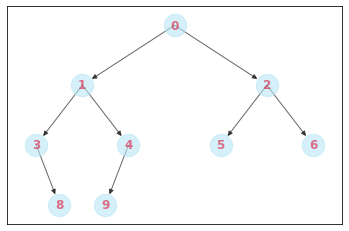

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


def create_graph(G, node, pos={}, x=0, y=0, layer=1):
    pos[node.key] = (x, y)
    if node.lchild:
        G.add_edge(node.key, node.lchild.key)
        l_x, l_y = x - 1 / 2 ** layer, y - 1
        l_layer = layer + 1
        create_graph(G, node.lchild, x=l_x, y=l_y, pos=pos, layer=l_layer)
    if node.rchild:
        G.add_edge(node.key, node.rchild.key)
        r_x, r_y = x + 1 / 2 ** layer, y - 1
        r_layer = layer + 1
        create_graph(G, node.rchild, x=r_x, y=r_y, pos=pos, layer=r_layer)
    return (G, pos)

def draw(node, titleTex=''):
    ''' 以 node 为根可视化二叉树树 '''
    graph = nx.DiGraph()
    graph, pos = create_graph(graph, node)
    fig, ax = plt.subplots()  # 比例可以根据树的深度适当调节
    if titleTex:
        fig.suptitle(titleTex)
    nx.draw_networkx(
        graph, pos,
        ax=ax,
        node_size=500, node_color='#bae6f4', alpha=0.6,
        font_color='#DC143C', font_weight='bold'
    )
    #plt.show()


draw(testTree.root)

### 2.3 树的遍历

#### 2.3.1 广度遍历

广度遍历：从上到下，左到右遍历树的节点。  
从上到下，左到右遍历符合先进先出的规则，故可以使用队列结构来辅助。具体为：从队列头部取出节点并打印，将其左右节点依次加到队列尾部。

In [5]:
def breadthTravel(root):
    if not root:
        return None
    
    queue = [root, ]  # 列表模拟队列
    while queue:
        node = queue.pop(0)
        print(node.key, end=' ')
        if node.lchild:
            queue.append(node.lchild)
        if node.rchild:
            queue.append(node.rchild)


breadthTravel(testTree.root)

0 1 2 3 4 5 6 8 9 

#### 2.3.2 深度遍历
按照遍历的顺序有三种：**前序**：根左右；**中序**：左根右；**后序**：左右根

##### 2.3.2.1 递归实现深度遍历

In [5]:
def preOrderRecursive(root):
    if not root:
        return None
    print(root.key, end=' ')
    preOrderRecursive(root.lchild)
    preOrderRecursive(root.rchild)


def inOrderRecursive(root):
    if not root:
        return None
    inOrderRecursive(root.lchild)
    print(root.key, end=' ')
    inOrderRecursive(root.rchild)


def postOrderRecursive(root):
    if not root:
        return None
    postOrderRecursive(root.lchild)
    postOrderRecursive(root.rchild)
    print(root.key, end=' ')


preOrderRecursive(testTree.root)
print()
inOrderRecursive(testTree.root)
print()
postOrderRecursive(testTree.root)

0 1 3 8 4 9 2 5 6 
3 8 1 9 4 0 5 2 6 
8 3 9 4 1 5 6 2 0 

##### 2.3.2.2 非递归实现深度遍历

深度遍历使用栈来辅助

In [7]:
def preOrderNonRec(root):
    stack = []  # 使用列表来模拟栈
    tmpNode = root
    while tmpNode or stack:
        while tmpNode:
            print(tmpNode.key, end=' ')
            stack.append(tmpNode)
            tmpNode = tmpNode.lchild

        tmpNode = stack.pop()
        tmpNode = tmpNode.rchild


preOrderNonRec(testTree.root)

0 1 3 8 4 9 2 5 6 

In [8]:
def inOrderNonRec(root):
    stack = []  # 使用列表来模拟栈
    tmpNode = root
    while tmpNode or stack:
        while tmpNode:
            stack.append(tmpNode)
            tmpNode = tmpNode.lchild

        tmpNode = stack.pop()
        print(tmpNode.key, end=' ')
        tmpNode = tmpNode.rchild


inOrderNonRec(testTree.root)

3 8 1 9 4 0 5 2 6 

In [9]:
def postOrderNonRec(root):
    stack = []  # 使用列表来模拟栈
    tmpNode = root
    while tmpNode or stack:
        while tmpNode:
            stack.append(tmpNode)
            tmpNode = tmpNode.lchild

        tmpNode = stack[-1]
        tmpNode = tmpNode.rchild
        
        if not tmpNode:
            node = stack.pop()
            print(node.key, end=' ')
            while stack and node is stack[-1].rchild:
                node = stack.pop()
                print(node.key, end=' ')


postOrderNonRec(testTree.root)

8 3 9 4 1 5 6 2 0 

#### 2.3.3 由遍历确定一颗树

在深度遍历序列中由包含中序的两种遍历就可以唯一确定一棵树，即**前中**或者**中后**可以唯一确定一棵树。因为前中后序依次为：根左右、左根右、左右根。如果没有中序那左右节点无法唯一划分。这方面的考题可能有：根据前中或者中后重构树，或者求另一种遍历(依然需要先重构树)

由 前序 与 中序 重构树：思路：前序的第一个元素为根节点，则中序序列中此元素左边都是根节点的左节点，右边是根节点的右节点。再递归左边部分、右边部分即可。这样时间复杂度 O(n^2), 空间复杂度 O(n^2)。

优化：可以使用元素的下标而非每次产生一个拷贝，另外由于元素互异，故可以使用 hashtable(即py的字典)来降低元素的查找，这样时间 O(n), 空间 O(n)。

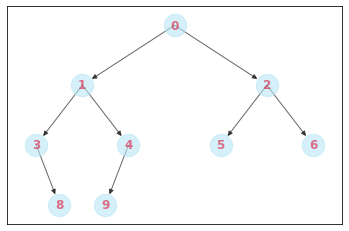

In [6]:
class treeNode():
    def __init__(self, item):
        self.key = item
        self.lchild = None
        self.rchild = None


def reConstructBinaryTree(preOrder, inOrder):
    ''' 由 前序 与 中序 重构树 '''
    # 检查输入
    if not preOrder or not inOrder or len(preOrder) != len(inOrder):
        return None

    # 根据前序对中序序列划分
    rootKey = preOrder[0]
    rootIndex = inOrder.index(rootKey)  # list 与 str 的 index 方法求元素索引

    leftPreOrder = preOrder[1:rootIndex + 1]
    rightPreOrder = preOrder[rootIndex + 1:]
    leftInOrder = inOrder[:rootIndex]
    rightInOrder = inOrder[rootIndex + 1:]

    # 递归构建树
    rootNode = treeNode(int(rootKey))
    rootNode.lchild = reConstructBinaryTree(leftPreOrder, leftInOrder)
    rootNode.rchild = reConstructBinaryTree(rightPreOrder, rightInOrder)

    return rootNode


preOrder = '013849256'
inOrder = '381940526'
reConsTree = reConstructBinaryTree(preOrder, inOrder)
draw(reConsTree)

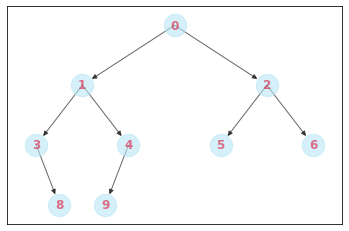

In [22]:
def reConstructBinaryTree(preOrder, inOrder):
    def build(start_pre, start_in, n):
        if n <= 0:
            return None
        root = treeNode(preOrder[start_pre])
        if n == 1:
            return root

        rootPos_in = index_in[preOrder[start_pre]]
        length = rootPos_in - start_in

        root.lchild = build(start_pre + 1, start_in, length)
        root.rchild = build(start_pre + length + 1, rootPos_in + 1, n - length - 1)
        return root
    index_in = {val:index for index, val in enumerate(inOrder)}
    return build(0, 0, len(preOrder))


preOrder = '013849256'
inOrder = '381940526'
reConsTree = reConstructBinaryTree(preOrder, inOrder)
draw(reConsTree)

'0'

In [10]:
ss = '381940526'

index = {val:i for i, val in enumerate(ss)}
index['0']

5

## 2.4 二叉堆
堆看起来像一颗树，但实际使用列表来表示。二叉堆常见有两种：最小堆（最小的键在最前）与最大堆（最大的键在最前）。

### 2.4.1 最小堆操作
基本操作有：
- `minBinaryHeap()`: 创建一个新的最小堆
- `insert(k)`: 添加新项到堆
- `findMin()`: 返回最小键值的项
- `delMin()`: 返回最小键值的项，并删除
- `isEmpty()`: 判断堆是否为空
- `size()`: 返回堆中项数
- `buildMinHeap()`: 从键值列表构建新最小堆

### 2.4.2 最小堆属性

#### 2.4.2.1 结构属性
为了保证堆的对数性能，需要保持树的平衡，即左右子节点深度之差不大于一。在堆的实现中创建完全二叉树来保持树的平衡。且完全二叉树由于左右节点紧密排列，可以使用列表表示。一般堆的列表表示中列表第一个位置不存放。  
则对于节点序号为 `x` 的节点其父节点序号为: `x // 2`, 左子节点为: `x * 2`, 右子节点为: `x * 2 + 1`

#### 2.4.2.2 排序属性
最小堆：父节点的键不大于子节点的键

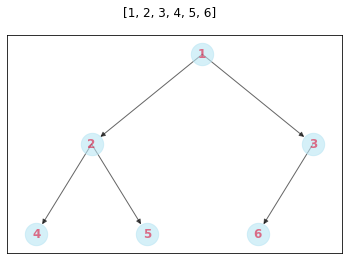

In [11]:
# 最小堆示意图：
minBinTreeDemo = completeBinaryTree()
minBinTreeDemo.appendLis([1, 2, 3, 4, 5, 6])
draw(minBinTreeDemo.root, titleTex='[1, 2, 3, 4, 5, 6]')

### 2.4.3 最小堆实现

初始化：使用一个列表表示，列表第一个元素使用零占位，堆从第二个位置开始存放。初始化时使用一个整数记录当前堆的大小。序号为 `x` 的节点其父节点序号为: `x // 2`, 左子节点序号: `x * 2`, 右子节点: `x * 2 + 1`

In [24]:
class minBinHeap():
    def __init__(self):
        self.heapLis = [None]
        self.currentSize = 0

`insert(k)`: 添加新项到堆。过程为先将项附加到列表尾部，再比较其与父节点大小，如果其键大于父节点的键则与父节点交换，重复此过程直到满足堆的排序属性

In [25]:
def insert(self, k):
    self.heapLis.append(k)
    self.currentSize += 1

    current = self.currentSize

    while (current >> 1) != 0:
        parent = current >> 1
        if self.heapLis[current] < self.heapLis[parent]:
            self.heapLis[current], self.heapLis[parent] = self.heapLis[parent], self.heapLis[current]
        else:
            break
        current = parent


minBinHeap.insert = insert

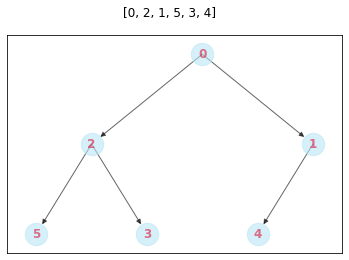

In [26]:
testMinHeap = minBinHeap()
testMinHeap.insert(5)
testMinHeap.insert(4)
testMinHeap.insert(3)
testMinHeap.insert(2)
testMinHeap.insert(1)
testMinHeap.insert(0)
tmpTree = completeBinaryTree()
tmpTree.appendLis(testMinHeap.heapLis[1:])
draw(tmpTree.root, titleTex=f'{testMinHeap.heapLis[1:]}')

`delMin()`: 返回并删除最小项。过程为：最小项在根节点，故移除根节点，并将最后一个项放于最小项的位置这样恢复了堆的结构属性，然后再从根项开始向下调整以恢复排序属性。

0

1

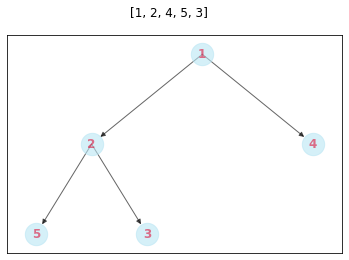

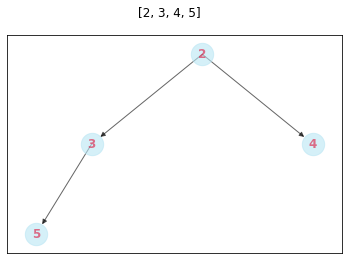

In [23]:
def delMin(self):
    minVal = self.heapLis[1]

    self.heapLis[1] = self.heapLis.pop()
    self.currentSize -= 1

    current = 1

    while (current << 1) <= self.currentSize:
        leftChild = current << 1
        rightChild = leftChild + 1

        # 判断是否有子节点为空，即判断子节点序号是否大于长度
        if leftChild > self.currentSize:
            # 左节点为空，则说明已无子节点
            break
        elif rightChild > self.currentSize:
            minChild = leftChild
        else:
            # 找出左右子节点中小的节点
            if self.heapLis[leftChild] > self.heapLis[rightChild]:
                minChild = rightChild
            else:
                minChild = leftChild

        if self.heapLis[minChild] < self.heapLis[current]:
            self.heapLis[minChild], self.heapLis[current] = self.heapLis[current], self.heapLis[minChild]
        else:
            break

        current = minChild

    return minVal


minBinHeap.delMin = delMin
testMinHeap.delMin()
tmpTree = completeBinaryTree()
tmpTree.appendLis(testMinHeap.heapLis[1:])
draw(tmpTree.root, titleTex=f'{testMinHeap.heapLis[1:]}')

minBinHeap.delMin = delMin
testMinHeap.delMin()
tmpTree = completeBinaryTree()
tmpTree.appendLis(testMinHeap.heapLis[1:])
draw(tmpTree.root, titleTex=f'{testMinHeap.heapLis[1:]}')

## 2.5 二叉查找树